In [20]:
import pandas as pd # 数据科学计算工具
import numpy as np # 数值计算工具
import matplotlib.pyplot as plt # 可视化
import seaborn as sns # matplotlib的高级API
from sklearn.model_selection import StratifiedKFold #交叉验证
from sklearn.model_selection import GridSearchCV #网格搜索
from sklearn.model_selection import train_test_split #将数据集分开成训练集和测试集
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from xgboost import plot_importance
##地址自己填
train = pd.read_csv("地址", dtype={"Age": np.float64},)

In [25]:
def harmonize_data(titanic):
    # 填充空数据 和 把string数据转成integer表示
    # 对于年龄字段发生缺失，我们用所有年龄的均值替代
    titanic["Age"] = titanic["Age"].fillna(titanic["Age"].median())
#     titanic = titanic.dropna(how='any')
    titanic["male"]   = 0
    titanic["famale"] = 0
    #性别one-hot化
    titanic.loc[titanic["Sex"] == "male", "male"] = 1
    titanic.loc[titanic["Sex"] == "female", "famale"] = 1

    titanic["Embarked"] = titanic["Embarked"].fillna("S")
    titanic["S"]   = 0
    titanic["C"]   = 0
    titanic["Q"]   = 0
    titanic.loc[titanic["Embarked"] == "S", "S"] = 1
    titanic.loc[titanic["Embarked"] == "C", "C"] = 1
    titanic.loc[titanic["Embarked"] == "Q", "Q"] = 1

    titanic["Fare"] = titanic["Fare"].fillna(titanic["Fare"].median())

    return titanic

train_data = harmonize_data(train)

[16:51:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


accuarcy: 75.93%


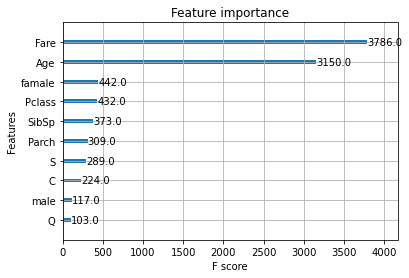

In [26]:
# 列出对生存结果有影响的字段
predictors = ["Pclass", "famale","male", "Age", "SibSp", "Parch", "Fare", "S", "C", "Q"]
seed = 1 #重现随机生成的训练
test_size = 0.33 #33%测试，67%训练
X_train, X_test, Y_train, Y_test = train_test_split(train_data[predictors], train_data['Survived'], test_size=test_size, random_state=seed)
# 算法参数
params = {
    'booster': 'gbtree',
    'objective': 'multi:softmax',
    'num_class': 3,
    'gamma': 0.1,
    'max_depth': 6,
    'lambda': 2,
    'subsample': 0.7,
    'colsample_bytree': 0.75,
    'min_child_weight': 3,
    'silent': 0,
    'eta': 0.1,
    'seed': 1,
    'nthread': 4,
}
# plst = params.items()
dtrain = xgb.DMatrix(X_train, Y_train) # 生成数据集格式
num_rounds = 500
model = xgb.train(params, dtrain, num_rounds) # xgboost模型训练

# 对测试集进行预测
dtest = xgb.DMatrix(X_test)
y_pred = model.predict(dtest)

# 计算准确率
accuracy = accuracy_score(Y_test,y_pred)
print("accuarcy: %.2f%%" % (accuracy*100.0))

# 显示重要特征
plot_importance(model)
plt.show()